In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import spacy
from ast import literal_eval
import folium
import re
import numpy as np
import dataframe_image as dfi



df = pd.read_csv('LAMX Front Desk (Combined) data.csv')
df

,Date,Name,Location,Total Family Members,Date of Birth,Country of Origin,MPP,Health Problem,Explain Health Problem,Victim of Crime/Violence in Mexico,Explain Crime/Violence,LGBTQ+,Notes,Victim of Crime/Violence
0,3/15/2022,Ilson Deribau,Ciudad Juarez,3.0,5/26/1985,Haiti,No,Si / Yes,Wife is pregnant,No / No,NaN,No,Traveling with pregnant wife and son (5months),No / No
1,3/15/2022,Rolando Flores Gonzalez,Ciudad Juarez,1.0,11/29/1967,Honduras,No,Si / Yes,Problemas con la columna,Si / Yes,Le cortaron un dedo,No,NaN,Si / Yes
2,3/15/2022,Miguerrose Camille,Ciudad Juarez,3.0,6/27/1997,Haiti,No,Si / Yes,Marido tiene presion alta y diabetes.,Si / Yes,Amenazas de golpes,No,Traveling with husband and son (2yrs),Si / Yes
3,3/15/2022,Bryan Steven Suniga,Ciudad Juarez,1.0,1/26/2004,Nicaragua,Si,Si / Yes,Severe headaches.,No / No,NaN,No,"MPP - Tiene fecha de corte en El Paso, Tx. el ...",No / No
4,3/15/2022,Daphka Dlutus,Ciudad Juarez,2.0,12/29/1999,Haiti,No,Si / Yes,Problemas con la columna por un accidente. Tam...,No / No,NaN,No,Traveling with fiance. She is pregnant.,No / No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7868,8/5/2022,Soraida Jimenez Ponciano,Ciudad Juarez,5.0,10/11/1994,Mexico,No,Si / Yes,Su marido padece de problemas para caminar bie...,Si / Yes,"En Ometepec, Guerrero los del crimen organizad...",No,Viaja con su esposo y sus 3 hijos menores de e...,Si / Yes
7869,8/5/2022,Ada Linda Velasquez Benitez,Ciudad Juarez,2.0,11/2/1997,Honduras,No,No / No,NaN,Si / Yes,"Aqui llegando a la ciudad, el coyote la vendio...",No,Viaja con su hija menor de 4 años de edad. Huy...,Si / Yes
7870,8/5/2022,Susana Alvarado Rodriguez,Ciudad Juarez,3.0,5/9/1993,Mexico,No,No / No,NaN,Si / Yes,"En Cd. Hidalgo, Michoacan sufrio de violencia,...",No,Viaja con sus 2 hijos menores de edad de 13 y ...,Si / Yes
7871,8/5/2022,Phony Vrunache,Ciudad Juarez,3.0,9/22/1976,Haiti,No,Si / Yes,El padece de dolor de estomago. Uno de los sob...,Si / Yes,Llegando a esta ciudad fueron victimas de asal...,No,Viaja con 2 sobrinos varones adultos. Tienen e...,Si / Yes


In [2]:
df["Victim of Crime/Violence in Mexico"].value_counts()

Victim of Crime/Violence in Mexico
Si / Yes                   5558
No / No                    2184
No lo sé / I don't know      64
Name: count, dtype: int64

In [3]:
replacement_statement = {"No lo sé / I don't know" : None,
"No / No" : False,
"Si / Yes" : True}
df["Victim of Crime/Violence in Mexico"] = df["Victim of Crime/Violence in Mexico"].replace(replacement_statement)
non_none_count = df['Victim of Crime/Violence in Mexico'].count()
number_of_trues = df['Victim of Crime/Violence in Mexico'].sum()

print(f"Percentage of Migrant Parties that have been victims to a Crime/Violence in Mexico: \033[1m{(number_of_trues/non_none_count):.2%} \033[0m")


Percentage of Migrant Parties that have been victims to a Crime/Violence in Mexico: 71.79% 


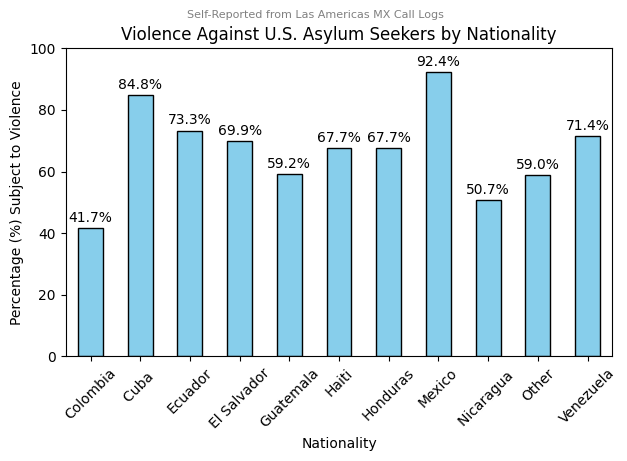

In [10]:
add_df = df
add_df["Country of Origin"] = df["Country of Origin"].replace("Brazil", None)
percentage_of_violence = add_df.groupby('Country of Origin')['Victim of Crime/Violence in Mexico'].mean() * 100

# Plot the bar graph
ax = percentage_of_violence.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Violence Against U.S. Asylum Seekers by Nationality')
plt.suptitle('Self-Reported from Las Americas MX Call Logs', fontsize=8, color='gray', y=0.95)
plt.xlabel('Nationality')
plt.ylabel('Percentage (%) Subject to Violence')
plt.xticks(rotation=45)
plt.ylim(0, 100)

for i, v in enumerate(percentage_of_violence):
    if v == 100:
        continue
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')


# Show the plot
plt.tight_layout()
plt.savefig("Violence in Mexico by Nationality.png")
plt.show()


In [ ]:
country_mapping = {
    'México': 'Mexico',
    'Venezula': 'Venezuela',
    'Nicaragua': 'Nicaragua',
    'venezuela' : 'Venezuela',
    'Otro': 'Other',
    "mexico": "Mexico",
    "Mujer" : "Other",
    "Hombre" : "Other"
}



df["Country of Origin"] = df["Country of Origin"].replace(country_mapping).str.strip()

category_counts = df['Country of Origin'].value_counts()
print(category_counts)
lowest_categories = category_counts.nsmallest(4).index.tolist()

# Combine them into "Other"
category_counts['Other'] = category_counts[lowest_categories].sum()
category_counts = category_counts.drop(lowest_categories)
category_counts = category_counts.sort_values(ascending=False)


# Create a pie chart using matplotlib.pyplot
plt.figure(figsize=(12, 12))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.0f%%', startangle=90, colors=plt.cm.Set3.colors)

# Customize the plot using Seaborn style
sns.set(style="whitegrid")
plt.title('Country of Origin per Migrant Party (1/1/21-12/31/2023)')
plt.savefig("Country of Origin per Migrant Party.png")

# Show the plot
plt.show()


In [ ]:
import calendar
import matplotlib as mpl
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'], format="mixed")
def replace_dates_before(date):
    start_date = datetime.strptime("2021-1-01", '%Y-%m-%d')
    if date < start_date:
        return start_date
    else:
        return date


df['Date'] = df['Date'].apply(replace_dates_before)
# Step 3: Extract month from 'Date of Appt' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

value_counts = df['Country of Origin'].value_counts()

# Get values occurring less than 5 times
values_to_replace = value_counts[value_counts < 5].index.tolist()

# Replace values with 'Other'
df['Country of Origin'] = df['Country of Origin'].replace(values_to_replace, 'Other')
'''
repeated_data = np.repeat(df.values, df['Total Family Members'], axis=0)

# Create a new DataFrame with the repeated rows
df_repeated = pd.DataFrame(repeated_data, columns=df.columns)

new_grouped = df_repeated.groupby(['Year', 'Month', 'Country of Origin']).size().unstack(fill_value=0)
dfi.export(new_grouped,"Country of Origin Per Year.png")
'''

# Step 4: Group data by month and country of origin
grouped = df.groupby(['Year', 'Month', 'Country of Origin']).size().unstack(fill_value=0)
# Step 5: Calculate percentage of each country of origin within each month group
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100


'''cmap = plt.cm.gist_rainbow
norm = mpl.colors.Normalize(vmin=0, vmax=len(percentages) - 1)
colors = [cmap(norm(i)) for i in range(len(percentages))]
'''

# Step 6: Plot the bar graph
#ax = percentages.plot(kind='bar', stacked=True,figsize=(16, 12), color=['#6495ED', '#3CB371','#FF6347', '#9370DB', '#FA8072', '#FFD700', '#FFC0CB','#40E0D0','#BA55D3','#98FF98','#FFDAB9'])
ax = percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#9467bd', '#ff1493', '#1f77b4', '#ff7f0e', '#d62728','#2ca02c'])
#ax = percentages.plot(kind='bar', stacked=True, figsize=(16, 12), color=['#4CAF50', '#2196F3', '#FFC107', '#FF5722', '#9C27B0', '#FF9800', '#607D8B', '#03A9F4', '#F44336', '#FFEB3B', '#795548'])
#ax = percentages.plot(kind='bar', stacked=True, figsize=(16, 12), color=['#7CB342', '#2196F3', '#FFC107', '#FF5722', '#9C27B0', '#FF9800', '#607D8B', '#FFD700', '#F44336', '#FFEB3B', '#8D6E63'])

plt.xlabel('Month of Case')
plt.ylabel('Percentage of Cases')
plt.title('Percentages of Cases per Month versus Country of Origin')
plt.legend(title='Country of Origin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(len(percentages)), [f"{calendar.month_abbr[int(month)]} {int(year)}" for year, month in percentages.index], rotation=45)
#plt.tight_layout()
plt.savefig("Cases per Month.png", bbox_inches='tight')
plt.show()


In [ ]:
import numpy as np

# Repeat each row based on the 'value' column
repeated_data = np.repeat(df.values, df['Total Family Members'], axis=0)

# Create a new DataFrame with the repeated rows
df_repeated = pd.DataFrame(repeated_data, columns=df.columns)
df_repeated.dropna(subset=["Date"], inplace = True)
# Resetting index to avoid duplicate index values
df_repeated.reset_index(drop=True, inplace=True)
df_repeated['Date'] = pd.to_datetime(df_repeated['Date'])

monthly_counts = df_repeated.groupby(pd.Grouper(key='Date', freq='M')).size()

#monthly_counts = (df['Total Family Members'] * df.groupby(pd.Grouper(key='Date', freq='M')).size()).astype(int)
#monthly_counts = monthly_counts.loc[monthly_counts.index.repeat(monthly_counts['Total Family Members'])]


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-')
plt.title('Calls to LAMX by Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.xticks(monthly_counts.index, monthly_counts.index.strftime('%B %Y'), rotation=90)
plt.savefig('Total Calls per Month.png', bbox_inches='tight')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import os
files = [pd.read_csv(os.path.join(os.getcwd(), filename)) for filename in os.listdir(os.getcwd()) if filename.endswith('.csv') and "(Combined)" not in filename]

df = pd.concat(files, axis=0, ignore_index=True)
df = df.drop_duplicates()



In [ ]:
df.columns

In [ ]:
df['Location'].value_counts()

In [ ]:
df['MPP'].value_counts()

In [ ]:
df['Expulsado bajo T42'].value_counts()

In [ ]:
df['Prior Deportation'].value_counts()

In [ ]:
df['Prior Removal'].value_counts()

In [ ]:
df['Albergue? '].value_counts()

In [ ]:
filtered_df = df[df['Albergue? '] == "No"]

filtered_df['Nombre de Albergue'].sample(100)

In [ ]:
df['¿El acto de violencia ocurrió en Ciudad Juarez?'].value_counts()


In [ ]:
df.dropna(thresh=1000, axis=1).columns

In [ ]:
df['En Ciudad Juarez?'].value_counts()

In [ ]:
df['In Juarez'].value_counts()

In [ ]:
df['En Ciudad Juarez?'].isna()

In [ ]:
(df['Explique el crimen o violencia en Mexico:'] + df['En Ciudad Juarez?']).dropna().sample(5)

In [ ]:
df_clean = df[['En Ciudad Juarez?','¿El acto de violencia ocurrió en Ciudad Juarez?']]
df_clean = df_clean.dropna(how='all')
df_clean

In [ ]:
def simplify_violence(row):
    answer1,answer2 = row["En Ciudad Juarez?"], row["¿El acto de violencia ocurrió en Ciudad Juarez?"] 
    if answer1 == "Si / Yes" or answer2 == 'Si':
        return "Yes"
    if answer1 == "No se / I don't know" or answer2 == "I don't know/remember":
        return None
    else:
        return "No"


df_clean['Did You Face Violence in Juarez?'] = df_clean.apply(simplify_violence, axis=1)
df_clean[df_clean['¿El acto de violencia ocurrió en Ciudad Juarez?'] == "Si"].sample(10)
df_clean[df_clean['Did You Face Violence in Juarez?'] == 'Yes'].sample(10)

In [ ]:
df_clean['Did You Face Violence in Juarez?'].value_counts()

In [ ]:
counts = df_clean['Did You Face Violence in Juarez?'].value_counts()
# Create a pie chart using matplotlib.pyplot
plt.figure(figsize=(10, 12))


def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
plt.pie(counts, labels=counts.index, autopct=autopct_format(counts), startangle=90, colors=plt.cm.Set1.colors)

# Customize the plot using Seaborn style
sns.set(style="whitegrid")
plt.title('Did You Face Violence in Juarez?')

plt.savefig("Did You Face Violence in Juarez?.png", bbox_inches='tight')


# Show the plot
plt.show()